# Project 3: Stickleback morphometrics - body and armor-plate shape

In this project, the number, area and shape of armor plating is measured as a continuous trait using a combination of `threshold`, `watershed` and `edit_contour`.

<div style="display: flex; flex-direction: row; text-align:left; gap: 10px;"  class="row">
    
<div class="col-md-6" style="flex: 1 1 0px;">
    
![Before](_figures/project_3_before.jpg)
    
**Input** - Stained threespine stickleback. The size of plates at a given plate index varies within at between ecotypes (e.g. lake and stream morphs)  
    
</div>
<div class="col-md-6" style="flex: 1 1 0px;">

![After](_figures/project_3_after.jpg)
    
**Results** - After applying adaptive thresholding and watershed algorithms, the plates separate. Where this is not the case they can be separated manually.
    
</div>
</div>

## Background 

Variation in continuous phenotypic traits like shape or area of certain structures are difficult to quantify in a discrete fashion, e.g. with landmarks, because they are too complex or have no underlying assumption of homology. 

Here, sticklback armor plates and their shape features are detected in a two-step process. First, a mask was set around the posterior region that contains the plates, which is then tresholded. Due to the red staining, the "red channel" contains highest signal-to-noise-ratio, and is thus used (specified in `threshold`). Then, the watershed algorithm is applied to the specified region to erode the area between the plates, which produces another binary image (fed to `detect_contour`). Remaining plate-overlap is removed with the `edit_contour` tool, and `detect_contour` is used a once more to determine the final plate boundaries. 

In the second step, the configuration file is modified to add `compute_shape_featues`, followed by a "silent run" `feedback=False`. By running this second step only after the initial plate separation, the first step with the actual plate segmentation can be run much faster: depending on the number of objects in the image, `compute_shape_featues` can be quite computationally intensive, so running it after the final contours have been detected will speed things up. This is a useful approach also for other scenarios.

The `watershed` algorithm, which helps to separate detected objects into "peaks of wanted information" and "valleys of unwanted information", is explained here: https://docs.opencv.org/master/d3/db4/tutorial_py_watershed.html 

**NOTE:** These are the same images as in https://www.phenopype.org/gallery/project_2/ - reference detection and ID-entry are shown there and thus skipped here.

## Preparation

In [1]:
import phenopype as pp
import os
import urllib.request

## change for your own machine
name_stub = "project_3"
working_dir = os.path.join(r"D:\workspace\git-repos\phenopype\phenopype-gallery\_temp", name_stub)
template_repo_path = r"D:\workspace\git-repos\phenopype\phenopype-templates"

## create dir, if not existent
if not os.path.isdir(working_dir):
    os.makedirs(working_dir)
os.chdir(working_dir)

## set template name 
template_name = "gallery_" + name_stub + ".yaml"

## download Pype-template from online-repo ...
try:
    url = "https://raw.githubusercontent.com/phenopype/phenopype-templates/main/templates/gallery/" + template_name
    urllib.request.urlretrieve(url, template_name)
    if os.path.isfile(template_name):
        template_path = template_name
except:
    print("could not retrieve template from online repo")

## ... or provide link to downloaded phenopype-templates repo (exchange for your own directory)
if os.path.isdir(template_repo_path):
    if "templates" in os.listdir(template_repo_path):
        template_path = os.path.join(template_repo_path, r"templates\gallery", template_name)
        
## confirm template exists
if os.path.isfile(template_path):
    print(os.path.abspath(template_path))
else:
    print("something went wrong - could not find template")

D:\workspace\git-repos\phenopype\phenopype-templates\templates\gallery\gallery_project_3.yaml


## Project

In [2]:
proj = pp.Project("project")

--------------------------------------------
Found existing project root directory - loading from:
D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_3\project

Project "project" successfully loaded with 3 images
--------------------------------------------


In [3]:
## add all stickleback-images from the data folder, but exclude the two that don't belong to the series 
proj.add_files(image_dir = r"../../gallery/data", include="stickle", exclude=["side","top"])

--------------------------------------------
phenopype will search for image files at

D:\workspace\git-repos\phenopype\phenopype-gallery\gallery\data

using the following settings:

filetypes: ['jpg', 'JPG', 'jpeg', 'JPEG', 'tif', 'png', 'bmp'], include: stickle, exclude: ['side', 'top'], mode: copy, recursive: False, resize: False, unique: path

Found image stickle1.jpg - 0__stickle1 already exists (overwrite=False)
Found image stickle2.jpg - 0__stickle2 already exists (overwrite=False)
Found image stickle3.jpg - 0__stickle3 already exists (overwrite=False)

Found 3 files
--------------------------------------------


In [10]:
## add the config template; provide a tag
proj.add_config(template_path=template_path, tag="v1", overwrite=True)

- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_3\project\data\0__stickle1\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_3\project\data\0__stickle2\pype_config_v1.yaml (overwritten)
- template saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_3\project\data\0__stickle3\pype_config_v1.yaml (overwritten)


In [11]:
## run image processing
for path in proj.dir_paths:
    pp.Pype(path, tag="v1")

Format path to abspath
- no annotation_type selected - returning all annotations

AUTOLOAD
- annotations loaded:
{
"contour": ["a", "b", "c"],
"drawing": ["a"],
"mask": ["a"],
"shape_features": ["a"]
}
updating pype config file


------------+++ new pype iteration 2022-01-17 22:13:04 +++--------------




PREPROCESSING
create_mask
- loaded existing annotation of type "mask" with ID "a": skipping (edit=False)


SEGMENTATION
threshold
- decompose image: using red channel
- including pixels from 1 drawn masks 
morphology
detect_contour
- loaded existing annotation of type "contour" with ID "a": overwriting (edit=overwrite)
- found 4 contours that match criteria
watershed
- even kernel size supplied, adding 1 to make odd
- found 12 contours that match criteria
detect_contour
- loaded existing annotation of type "contour" with ID "b": overwriting (edit=overwrite)
- found 9 contours that match criteria
edit_contour
- loaded existing annotation of type "drawing" with ID "a": skipping (edit=Fa



------------+++ new pype iteration 2022-01-17 22:14:46 +++--------------




PREPROCESSING
create_mask
- loaded existing annotation of type "mask" with ID "a": skipping (edit=False)


SEGMENTATION
threshold
- decompose image: using red channel
- including pixels from 1 drawn masks 
morphology
detect_contour
- loaded existing annotation of type "contour" with ID "a": overwriting (edit=overwrite)
- found 1 contours that match criteria
watershed
- even kernel size supplied, adding 1 to make odd
- found 7 contours that match criteria
detect_contour
- loaded existing annotation of type "contour" with ID "b": overwriting (edit=overwrite)
- found 5 contours that match criteria
edit_contour
- loaded existing annotation of type "drawing" with ID "a": skipping (edit=False)
detect_contour
- loaded existing annotation of type "contour" with ID "c": overwriting (edit=overwrite)
- found 5 contours that match criteria


VISUALIZATION
select_canvas
- red channel


SEGMENTATION
edit_contour
BIER
dete

AttributeError: '_GUI' object has no attribute 'colour_current_bin'

detect_contour
- found 15 contours that match criteria


VISUALIZATION
select_canvas
- red channel
draw_contour
draw_mask


EXPORT
save_annotation
- loading existing annotation file
- updating annotation of type "mask" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "b" in "annotations_v1.json" (overwrite="entry")
- updating annotation of type "contour" with id "c" in "annotations_v1.json" (overwrite="entry")
- writing annotation of type "contour" with id "d" to "annotations_v1.json"
- updating annotation of type "drawing" with id "a" in "annotations_v1.json" (overwrite="entry")
- writing annotation of type "drawing" with id "b" to "annotations_v1.json"
- updating annotation of type "shape_features" with id "a" in "annotations_v1.json" (overwrite="entry")


------------+++ finished pype iteration +++--------------
-------(End with Ctr

## Edit config to extract shape features

In [12]:
target1 = """    - measurement:"""
replacement1 = """    - measurement:
        - compute_shape_features:
            features: [basic, moments, hu_moments]"""

proj.edit_config(tag="v1", target=target1, replacement=replacement1)

In [13]:
## run image processing with deactivated feedback 
for path in proj.dir_paths:
    pp.Pype(path, tag="v1", feedback=False)

Format path to abspath
- no annotation_type selected - returning all annotations

AUTOLOAD
- annotations loaded:
{
"contour": ["a", "b", "c", "d"],
"drawing": ["a", "b"],
"mask": ["a"],
"shape_features": ["a"]
}


------------+++ new pype iteration 2022-01-17 22:16:19 +++--------------




PREPROCESSING
create_mask
- loaded existing annotation of type "mask" with ID "a": skipping (edit=False)


SEGMENTATION
threshold
- decompose image: using red channel
- including pixels from 1 drawn masks 
morphology
detect_contour
- loaded existing annotation of type "contour" with ID "a": overwriting (edit=overwrite)
- found 4 contours that match criteria
watershed
- even kernel size supplied, adding 1 to make odd
- found 12 contours that match criteria
detect_contour
- loaded existing annotation of type "contour" with ID "b": overwriting (edit=overwrite)
- found 9 contours that match criteria
edit_contour
- loaded existing annotation of type "drawing" with ID "a": editing (edit=True)
BIER
detect_c

In [8]:
## collect results and store in folder "<project-root>/results/annotations"
proj.collect_results("v1", "annotations", "annotations", overwrite=True)

Created D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_3\project\results\annotations
Search string: ['annotations_v1']
Collected annotations_v1.json from 0__stickle1
0__stickle1_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_3\project\results\annotations\0__stickle1_annotations_v1.json.
Collected annotations_v1.json from 0__stickle2
0__stickle2_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_3\project\results\annotations\0__stickle2_annotations_v1.json.
Collected annotations_v1.json from 0__stickle3
0__stickle3_annotations_v1.json saved under D:\workspace\git-repos\phenopype\phenopype-gallery\_temp\project_3\project\results\annotations\0__stickle3_annotations_v1.json.



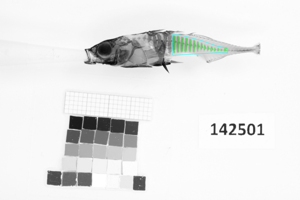
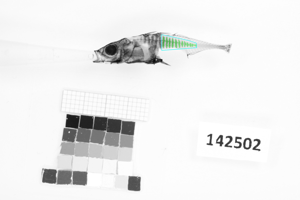
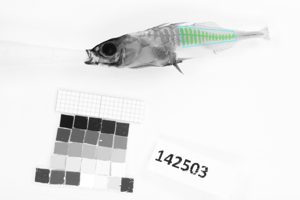


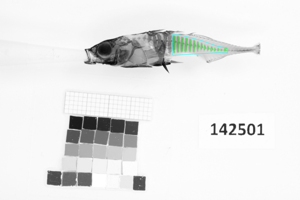
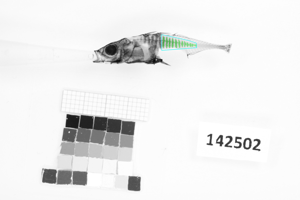
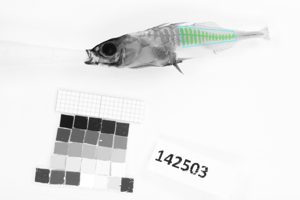

In [14]:
## display results
import ipyplot ## install with `pip install ipyplot`

canvas_list = []
for path in proj.dir_paths:
    canvas_list.append(pp.load_image(os.path.join(path, "canvas_v1.jpg"), mode="rgb"))

ipyplot.plot_images(canvas_list, img_width=300)